In [76]:
import pandas as pd
import numpy as np

path = "/Users/torreshong/Documents/GitHub/DS105_Project/6622_jobs.xls"

df_import = pd.read_excel(path)
df_import.shape
df_import


,Unnamed: 0,title,details,deadline,opport_type,commence_date,contract_type,location,Renumeration,company,links
0,0,Rothschild & Co - Private Equity Long-Term Int...,This London-based 6-month internship is an exc...,2023-04-30,Internship,2023-07-01 00:00:00,Temporary,London,NaN,Rothschild & Co,https://careers.lse.ac.uk//students/jobs/detai...
1,1,2023 HSBC Global Graduate Programme (Hong Kong...,You’re excited about starting your career and ...,2023-01-06,Graduate employment,2023-07-03 00:00:00,Temporary,Hong KongSingapore,NaN,HSBC (HSBC) - Hong Kong,https://careers.lse.ac.uk//students/jobs/detai...
2,2,2023 HSBC Global Internship Programme (Hong Ko...,You’re excited about starting your career and ...,2023-01-06,Internship,2023-06-05 00:00:00,Temporary,Hong KongSingapore,NaN,HSBC (HSBC) - Hong Kong,https://careers.lse.ac.uk//students/jobs/detai...
3,3,"Graduate Training Scheme, Capital Markets",Graduate Training Scheme – LondonGreySpark Par...,2022-12-17,Graduate employment,9th Jan 2023,Permanent,London,NaN,GreySpark Partners Ltd,https://careers.lse.ac.uk//students/jobs/detai...
4,4,6-Months Internship – Sell-side Tech M&A,"At IPTP, we understand software from decades o...",2022-12-31,Internship,01/01/2023,Temporary,France,NaN,Inflexion Points Technology Partners (IPTP),https://careers.lse.ac.uk//students/jobs/detai...
...,...,...,...,...,...,...,...,...,...,...,...
6618,6618,2012 Summer Internship - Financial Software De...,Business: Financial Systems Area: Capital Mark...,2012-05-31,All types of work,NaN,NaN,,Salary competitive,FIS Global (FIS),https://careers.lse.ac.uk//students/jobs/detai...
6619,6619,Technical Consultant - Graduate Programme 2012,TECHNICAL CONSULTANTBusiness: Financial System...,2012-05-31,All types of work,Graduate Induction Week: 3rd of September 2012,NaN,,Salary competitive,FIS Global (FIS),https://careers.lse.ac.uk//students/jobs/detai...
6620,6620,Risk Implementation Consultant - Graduate Prog...,RISK IMPLEMENTATION CONSULTANTBusiness: Financ...,2012-05-31,All types of work,Graduate Induction Week: 3rd of September 2012,NaN,,Salary competitive,FIS Global (FIS),https://careers.lse.ac.uk//students/jobs/detai...
6621,6621,Project Consultant - Graduate Programme 2012,PROJECT CONSULTANTBusiness: Financial Systems ...,2012-05-31,All types of work,Graduate Induction Week:3rd of September 2012,NaN,,Salary competitive,FIS Global (FIS),https://careers.lse.ac.uk//students/jobs/detai...


In [77]:
df_job_types = df_import.iloc[:, [4,6]]

In [78]:
# Filtering df_job_types to create two new Series for the stacked bar chart
df_permanent = df_job_types[df_job_types.iloc[:, 1] == "Permanent"]
df_temporary = df_job_types[df_job_types.iloc[:, 1] == "Temporary"]

df_permanent


,opport_type,contract_type
3,Graduate employment,Permanent
9,Graduate employment,Permanent
10,Graduate employment,Permanent
11,Graduate employment,Permanent
13,Graduate employment,Permanent
...,...,...
5237,Graduate employment,Permanent
5238,Graduate employment,Permanent
5242,Entrepreneurship,Permanent
5246,Graduate employment,Permanent


In [79]:
import matplotlib.pyplot as plt
# Count the frequency of each string in each of the two Series
counts_permanent = df_permanent.value_counts()
counts_temporary = df_temporary.value_counts()

# Plot the first stacked bar graph
#grad_counts = counts_permanent.loc[["Graduate employment", "Experienced hire (2+ years)"]]
#grad_counts.plot.bar(color=['r', 'b'])
#plt.title("Permanent Contract Types")
#plt.xlabel("Contract Type")
#plt.ylabel("Number of Job Postings")
#plt.show()

# Plot the second stacked bar graph
#intern_counts = counts_temporary.loc[["Internship", "Part-time jobs"]]
#intern_counts.plot.bar(color=['r', 'b'])
#plt.title("Temporary Contract Types")
#plt.xlabel("Contract Type")
#plt.ylabel("Number of Job Postings")
#plt.show()

# Plot the first stacked bar graph
#df_grad = df_permanent[df_permanent.iloc[:, 0] == "Graduate employment"]
#df_experienced = df_permanent[df_permanent.iloc[:, 0] == "Experienced hire (2+ years)"]
#counts_permanent.plot.bar("Graduate employment", df_grad, color='r')
#plt.bar("Experienced hire (2+ years)", df_experienced, color='b')
#plt.title("Permanent Contract Types")
#plt.xlabel("Contract Type")
#plt.ylabel("Number of Job Postings")
#plt.show()

# Plot the second stacked bar graph
#df_internship = df_temporary[df_temporary.iloc[:, 0] == "Internship"]
#df_parttime = df_temporary[df_temporary.iloc[:, 0] == "Part-time jobs"]
#counts_permanent.plot.bar("Internship", df_internship, color='r')
#plt.bar("Part-time jobs", df_parttime, color='b')
#plt.title("Temporary Contract Types")
#plt.xlabel("Contract Type")
#plt.ylabel("Number of Job Postings")
#plt.show()


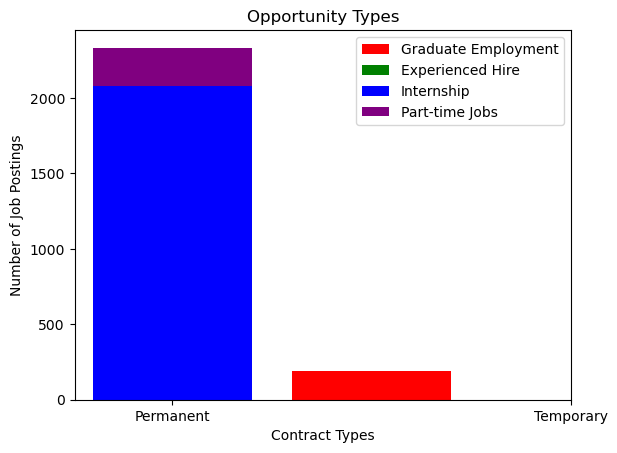

In [80]:
grad_counts = counts_permanent.loc[["Graduate employment", "Experienced hire (2+ years)"]].reset_index() #reset index to reset the dataframes to integer values, and pass the contract type labels as the x-axis values
exp_counts = counts_permanent.loc[["Experienced hire (2+ years)"]].reset_index()

intern_counts = counts_temporary.loc[["Internship"]].reset_index()
pt_counts = counts_temporary.loc[["Part-time jobs"]].reset_index()

fig, ax = plt.subplots() #to create a figure and a set of subplots - tried using a single bar chart to stack and failed


#to specify that the first bar in the stack (grad_counts) should start from the origin of the y-axis
bottom = np.zeros(len(grad_counts.index))


#spltting the bars
bar_1 = ax.bar(grad_counts.index, grad_counts.iloc[:,2].values, color='r')
bar_2 = ax.bar(exp_counts.index, exp_counts.iloc[:,2].values, color='g', bottom=grad_counts.iloc[:,2].values)
bar_3 = ax.bar(intern_counts.index, intern_counts.iloc[:,2].values, color='b')
bar_4 = ax.bar(pt_counts.index, pt_counts.iloc[:,2].values, color='purple', bottom=intern_counts.iloc[:,2].values)

#titles, x & y axis, legend
ax.set_title("Opportunity Types")
ax.set_xlabel("Contract Types")
ax.set_ylabel("Number of Job Postings")
ax.legend((bar_1, bar_2, bar_3, bar_4), ('Graduate Employment', 'Experienced Hire', 'Internship', 'Part-time Jobs'))
ax.set_xticks([0, 2])
ax.set_xticklabels(["Permanent", "Temporary"])
plt.show()



In [81]:
#fig, ax = plt.subplots()

#ax.bar(grad_counts.index, grad_counts.iloc[:,2].values, color='r', label='Graduate Employment')
#ax.bar(exp_counts.index, exp_counts.iloc[:,2].values, color='y', bottom=grad_counts.iloc[:,2].values, label='Experienced Hire')
#ax.bar(intern_counts.index, intern_counts.iloc[:,2].values, color='b', bottom=grad_counts.iloc[:,2].values + exp_counts.iloc[:,2].values, label='Internship')
#ax.bar(pt_counts.index, pt_counts.iloc[:,2].values, color='g', bottom=grad_counts.iloc[:,2].values + exp_counts.iloc[:,2].values + intern_counts.iloc[:,2].values, label='Part-Time Jobs')

#ax.set_title("Opportunity Types")
#ax.set_xlabel("Contract Types")
#ax.set_ylabel("Number of Job Postings")
#ax.legend((bar_1, bar_2, bar_3, bar_4), ('Graduate Employment', 'Experienced Hire', 'Internship', 'Part-time Jobs'))
#ax.set_xticks([0, 2])
#ax.set_xticklabels(["Permanent", "Temporary"])

#plt.show()


In [82]:
#fig, ax = plt.subplots()

#grad_counts = counts_permanent.loc[["Graduate employment", "Experienced hire (2+ years)"]] this doesn't run because it is a tuple
#grad_counts = counts_permanent.loc[["Graduate employment", "Experienced hire (2+ years)"]]

#intern_counts = counts_temporary.loc[["Internship", "Part-time jobs"]] same issue as the above
#intern_counts = counts_temporary.loc[["Internship", "Part-time jobs"]]


#ax.bar(grad_counts.index, grad_counts.values, color='r', label='Permanent Contract Types')
#ax.bar(intern_counts.index, intern_counts.values, color='b', bottom=grad_counts.values, label='Temporary Contract Types')

#ax.set_title("Stacked Bar Graph")
#ax.set_xlabel("Contract Type")
#ax.set_ylabel("Number of Job Postings")
#ax.legend()
#plt.show()
